## Dataset ##

In [1]:
class ClassDictionary():

    def __init__(self):
        fileClassi = open("classi.txt","r")
        i = 0
        self.classes = {}

        while True:
            riga  = fileClassi.readline()
            if riga == "":
                break
            self.classes[i] = riga.split('\n')[0]
            i +=1
            
    
        fileClassi.close()

    def get(self):
        return self.classes
    
    def IndexList(self):
        return list(self.classes.keys())
    
    def LabelList(self):
        return list(self.classes.values())

In [2]:
cDict = ClassDictionary()
classes = cDict.get()
indexlist = cDict.IndexList()

print(indexlist)
print(cDict.LabelList())
print(classes)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
['Sala 1', 'Sala 2', 'Sala 3', 'Sala 4', 'Sala 5', 'Sala 6', 'Sala 7', 'Sala 8', 'Sala 9', 'Sala 10', 'Sala 11 ', 'Sala 12', 'Sala 13', 'Cortile degli Stemmi', 'Sala Carrozze', 'Cortile Parisio', 'Biglietteria', 'Portico', 'Scala', 'Loggetta', 'BoxSala', 'Area Sosta']
{0: 'Sala 1', 1: 'Sala 2', 2: 'Sala 3', 3: 'Sala 4', 4: 'Sala 5', 5: 'Sala 6', 6: 'Sala 7', 7: 'Sala 8', 8: 'Sala 9', 9: 'Sala 10', 10: 'Sala 11 ', 11: 'Sala 12', 12: 'Sala 13', 13: 'Cortile degli Stemmi', 14: 'Sala Carrozze', 15: 'Cortile Parisio', 16: 'Biglietteria', 17: 'Portico', 18: 'Scala', 19: 'Loggetta', 20: 'BoxSala', 21: 'Area Sosta'}


In [3]:
import torch
from torch import Tensor
from torchvision import transforms
import numpy as np
import torch

In [4]:
from torch.utils.data.dataset import Dataset
from PIL import Image
from os import path

class ScenesDatabase(Dataset):
    def __init__(self,base_path,txt_list,transform = None, split = "first") :
        
        np.random.seed(5678) 
        torch.random.manual_seed(5678)

        self.base_path = base_path
        self.images = np.loadtxt(txt_list,dtype = str , delimiter= ' ')
        np.random.shuffle(self.images)
        
        split_idx = len(self.images) // 2
        if split ==  "first":
            self.images = self.images[:split_idx]
        elif split == "second":
            self.images = self.images[split_idx:]
        self.transform = transform
        
    def __getitem__(self, index):
        f,c = self.images[index]
        res = f.split('/')

        if res[7] == "":
           f = res[6] + '/' + res[7] + res[8] 
        else:
           f = res[6] + '/' + res[7]
           if res[7].split('.')[1] != "jpg":
            f = f + "jpg"

       #print(self.base_path,f)
  
        im = Image.open(path.join(self.base_path,f))

        if self.transform is not None: 
           im = self.transform(im)

        label = int(c)

        return {'image' : im, 'label':label}
    
    def getLabel(self,index):
        return int(self.images[index][1])

    def __len__(self):
        return int(len(self.images))
       
    



In [5]:
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt')
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt')
validation = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',split = "second") 

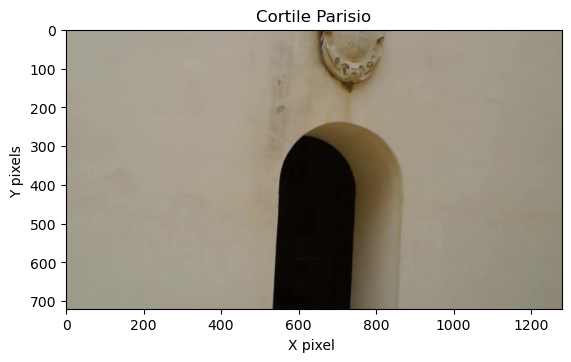

width:  1280  height:  720


In [6]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

sample = train[1]

#print(sample["label"])
 
plt.title(classes[sample["label"]])
plt.xlabel("X pixel ")
plt.ylabel("Y pixels ")

img = sample["image"]
 
#image = mpimg.imread(sample["image"])
plt.imshow(img)
plt.show()
print("width: ",img.width," height: ",img.height)

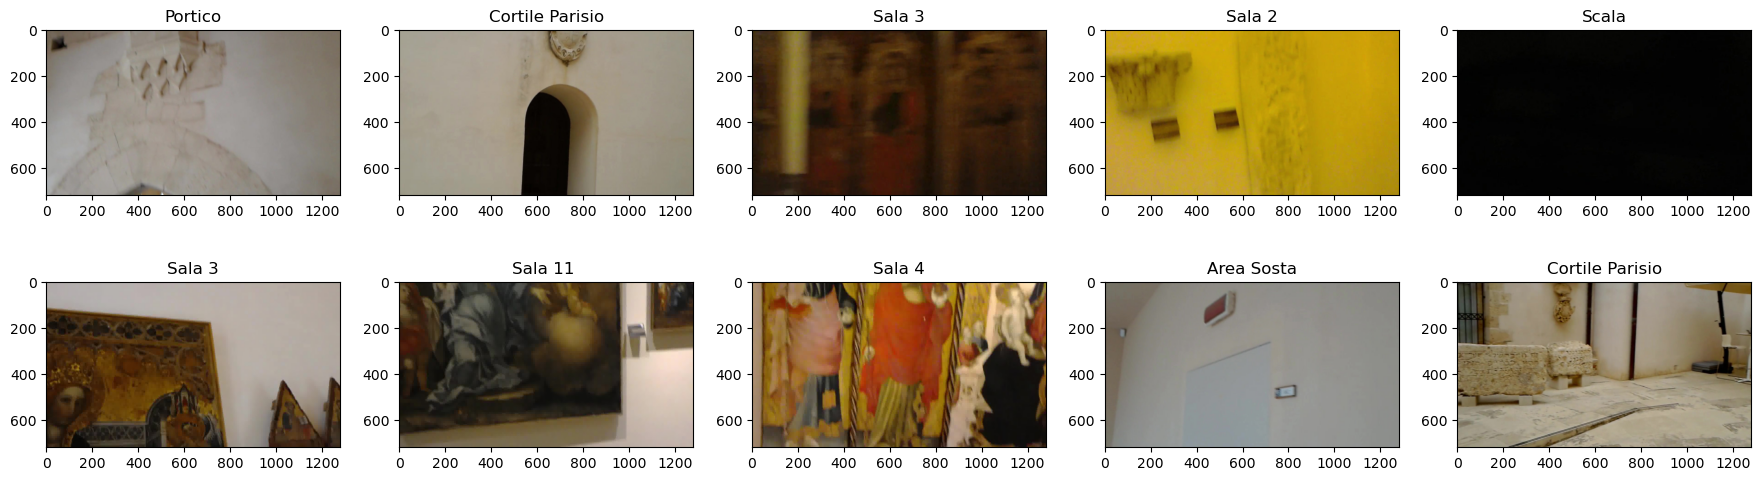

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(22,6)) 

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(classes[train.getLabel(i)]) 
    plt.imshow(train[i]["image"])

plt.show()

49127
[1324, 2755, 2901, 4087, 4053, 946, 3697, 2451, 3614, 2053, 2591, 865, 1042, 2020, 1133, 3628, 1459, 2049, 2308, 1478, 1652, 1252]


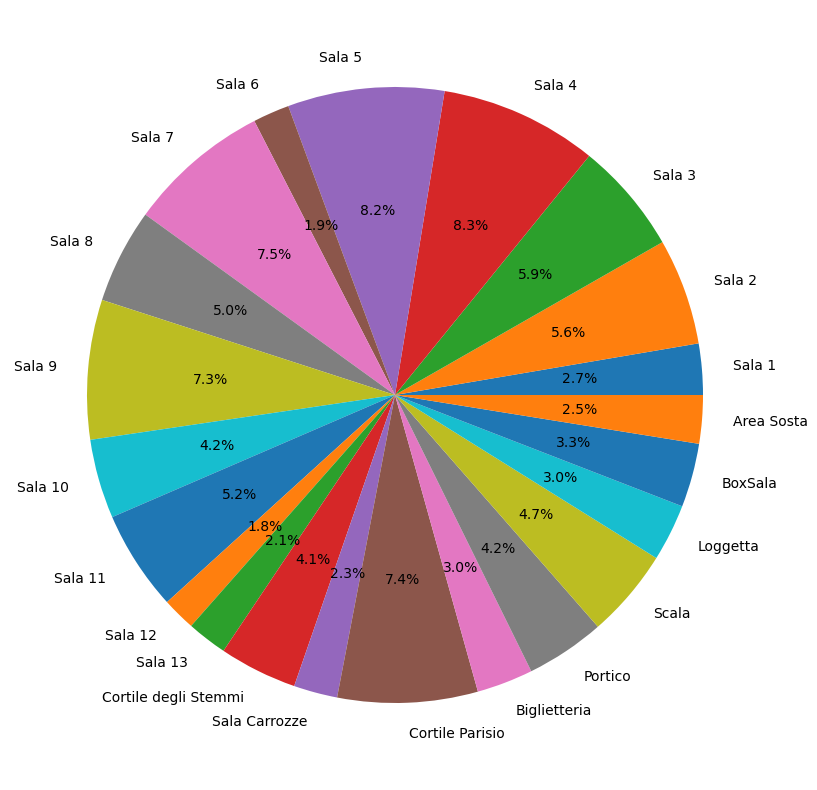

In [8]:
#info training set

indexlist = cDict.IndexList()

print(len(train))

for i in range(len(train)):
    indexlist[train.getLabel(i)] += 1


print(indexlist)
plt.figure(figsize=(10,10))
plt.pie(indexlist, labels= cDict.LabelList() , autopct='%1.1f%%' )
#plt.legend(title = "Classi")
plt.show() 

21054
[555, 1218, 1219, 1758, 1714, 392, 1602, 1047, 1606, 891, 1094, 383, 489, 877, 523, 1582, 625, 875, 937, 639, 700, 559]


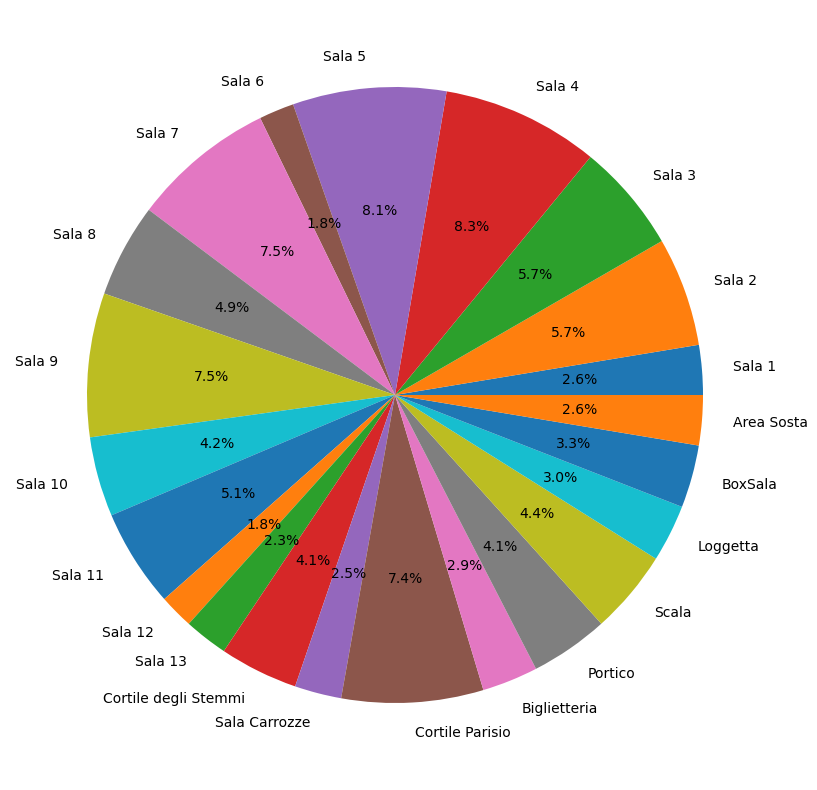

In [9]:
#info test set

indexlist = cDict.IndexList()

print(len(test))

for i in range(len(test)):
    indexlist[test.getLabel(i)] += 1

print(indexlist)
plt.figure(figsize=(10,10))
plt.pie(indexlist, labels= cDict.LabelList() , autopct='%1.1f%%' )
#plt.legend(title = "Classi")
plt.show() 

In [ ]:
#info validation set

indexlist = cDict.IndexList()

print(len(validation))

for i in range(len(test)):
    indexlist[validation.getLabel(i)] += 1

print(indexlist)
plt.figure(figsize=(10,10))
plt.pie(indexlist, labels= cDict.LabelList() , autopct='%1.1f%%' )
#plt.legend(title = "Classi")
plt.show()

In [10]:
#per lavorare con immagini più piccole 
height = (int)(720/8)
width = (int)(1280/8)

transform = transforms.Compose([transforms.Resize([height,width]),transforms.ToTensor()])
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',transform)
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',transform) 

In [11]:
print (train[1]["image"].shape)
print (train[1]["label"])

torch.Size([3, 90, 160])
15


In [12]:
def AvgFun(dataset):

    m = np.zeros(3)
    s = np.zeros(3)

    for i in range(len(dataset)):
        m+= dataset[i]['image'].sum(1).sum(1).numpy()

    m=m/(len(dataset)*(height)*(width))

    for sample in dataset:
        s+=((sample['image']-torch.Tensor(m).view(3,1,1))**2).sum(1).sum(1).numpy()
        
    s=np.sqrt(s/(len(dataset)*(height)*(width)))

    print("Medie",m)
    print("Dev.Std.",s)

    return m,s 

Calcolo medie per normalizzazione 

In [13]:
#m,s = AvgFun(train)

In [14]:
#valori ottenuti precedentemente dal training sett (valori da ricalcolare)

m = [0.44994618 ,0.40115653 ,0.31029609] #media
s = [0.28881772 ,0.27676441 ,0.28138952] #deviazione standard

transform = transforms.Compose([transforms.Resize([height,width]),transforms.ToTensor(), transforms.Normalize(m,s)])
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',transform) 


In [15]:
sample = train[2]

print(sample['image'].shape)
print(sample['label'])

torch.Size([3, 90, 160])
2


In [16]:
#m,s = AvgFun(test)

In [17]:
#valori ottenuti precedentemente dal test set (valori da ricalcolare)

m = [0.45105574 ,0.40203596 ,0.31031912]
s = [0.28889023 ,0.27667868 ,0.28135212]

transform = transforms.Compose([transforms.Resize([height,width]),transforms.ToTensor(), transforms.Normalize(m,s)])
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',transform) 

In [18]:
sample = test[2]

print(sample['image'].shape)
print(sample['label'])

torch.Size([3, 90, 160])
13


In [19]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train, batch_size=100, num_workers=0 , drop_last= True) 
test_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

In [20]:
for batch in train_loader: 
    break

print(batch["image"].shape)
print(batch["label"].shape)

torch.Size([100, 3, 90, 160])
torch.Size([100])


In [21]:
print(torch.cuda.is_available())

True


## Fine-tuning ##
hardware poco efficente

In [22]:
import torchvision.models as models

model = models.resnet18()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [23]:
#rendiamo le immagini compatibili con il nuovo modello 

transform = transforms.Compose([transforms.Resize([256]), transforms.CenterCrop([224])])
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',transform) 
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',transform) 

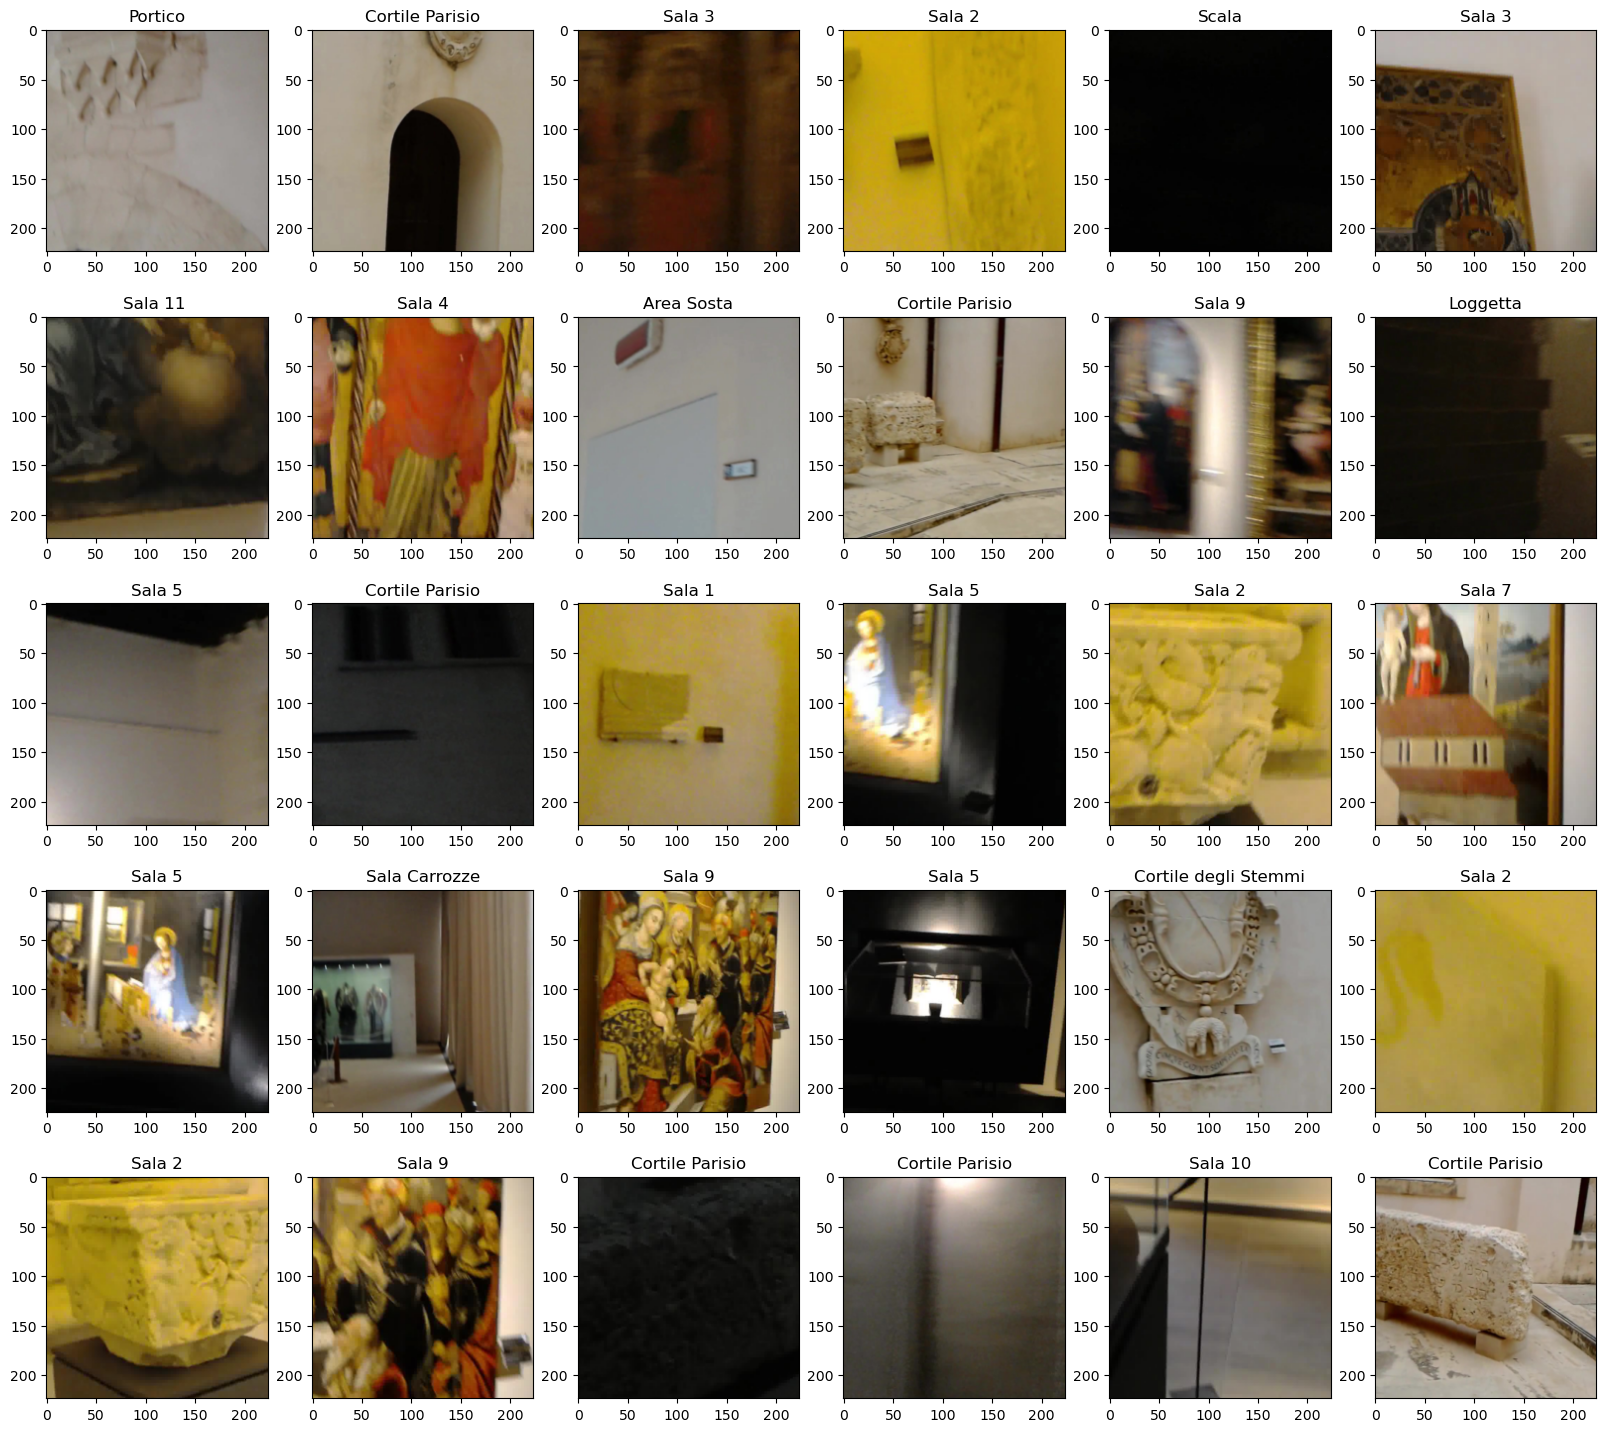

In [24]:
plt.figure(figsize=(20,18)) 

for i in range(30):
    plt.subplot(5,6,i+1)
    plt.title(classes[train.getLabel(i)]) 
    plt.imshow(train[i]["image"])

plt.show()

Data agumentation

In [25]:
m = [0.485, 0.456, 0.408]
s = [0.229, 0.224, 0.225] 

train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(m, s)
])

In [26]:
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(m,s)
])

In [27]:
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',train_transform) 
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',test_transform) 

In [28]:
train_loader = DataLoader(train, batch_size=100, num_workers=0 , drop_last= True) 
test_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

In [29]:
for batch in train_loader: 
    break

print(batch["image"].shape)
print(batch["label"].shape)

torch.Size([100, 3, 224, 224])
torch.Size([100])


In [30]:
from torch import nn
import torchvision.models as models
from torchvision.models.resnet import ResNet18_Weights

class BellomoClassifier(nn.Module):

    def __init__(self):
        super(BellomoClassifier, self).__init__()

        #self.resnet = models.resnet18(pretrained = True)
        self.resnet = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        self.features = nn.Sequential(*list(list(self.resnet.children())[:-1])) #rimozione ultimo livello
        self.flatten = nn.Flatten()
        
        # Classificatore
        self.fc = nn.Sequential(
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256,22)
        )


    def forward(self,x):
        #Applichiamo le diverse trasformazioni in cascata 
        x = self.features(x)
        x = self.flatten(x)
        #x = self.fc(x.view(x.shape[0],-1))
        x = self.fc(x) 
        return x

In [31]:
net = BellomoClassifier()
total_params = sum(p.numel() for p in net.parameters())
print(total_params)

11826494


In [32]:
class AverageValueMeter(): 
    
    def __init__(self): 
        self.reset()

    def reset(self): 
        self.sum = 0 
        self.num = 0

    def add(self, value, num): 
        self.sum += value*num 
        self.num += num

    def value(self): 
        try:
            return self.sum/self.num 
        except:
            return None

In [33]:
def test_classifier(model, loader):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    predictions, labels = [], []
    for batch in loader:
        x = batch["image"].to(device)
        y = batch["label"].to(device)
        output = model(x)
        preds = output.to('cpu').max(1)[1].numpy()
        labs = y.to('cpu').numpy()
        predictions.extend(list(preds))
        labels.extend(list(labs))
    return np.array(predictions), np.array(labels)

In [34]:
from torch.optim import SGD
from torch.utils.tensorboard import SummaryWriter 
from sklearn.metrics import accuracy_score
from os.path import join

def train_classifier(model, train_loader, test_loader, exp_name='experiment', lr=0.01, epochs=10, momentum=0.99, logdir='logs/BellomoClassifier/', start_epochs = 0):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr, momentum=momentum) 
    loss_meter = AverageValueMeter()
    acc_meter = AverageValueMeter()

    writer = SummaryWriter(join(logdir,'%d-%s'%(epochs,"epoche")))
   
    device = "cuda" if torch.cuda.is_available() else "cpu" 

    for param in model.resnet.parameters():
        param.requires_grad = False

    model.to(device)
    print("device:",device)
    #definiamo un dizionario contenente i loader di training e test 
    loader = {
        'train' : train_loader,
        'test' : test_loader 
    }
    #inizializziamo il global step
    global_step = 0
    for e in range(epochs):
        
        if e < start_epochs:
            continue
        
        print("start new epochs %d"%(e+1))

        for mode in ['train','test']:
            loss_meter.reset(); acc_meter.reset()
            model.train() if mode == 'train' else model.eval()
            
            with torch.set_grad_enabled(mode=='train'): #abilitiamo i gradienti solo in training
                for batch in (loader[mode]):
                    #print("batch")
                    x,y = batch
                    x= batch["image"].to(device) 
                    #y=torch.tensor(batch["label"]).to(device)
                    y = batch["label"].clone().detach().to(device)
                    output = model(x)
              
                    n = x.shape[0] #numero di elementi nel batch
                    global_step += n
                    l = criterion(output,y)

                if mode=='train': 
                    l.backward()
                    optimizer.step() 
                    optimizer.zero_grad()

                acc = accuracy_score(y.to('cpu'),output.to('cpu').max(1)[1]) 
                loss_meter.add(l.item(),n)
                acc_meter.add(acc,n)
 
                if mode=='train':
                    writer.add_scalar('loss/train', loss_meter.value(), global_step=global_step) 
                    writer.add_scalar('accuracy/train', acc_meter.value(), global_step=global_step)
        
            writer.add_scalar('loss/' + mode, loss_meter.value(), global_step=global_step) 
            writer.add_scalar('accuracy/' + mode, acc_meter.value(), global_step=global_step)
        
        torch.save(model.state_dict(),'%s-%d.pth'%(exp_name,e+1)) 
    return model

In [35]:
#net = BellomoClassifier() 
#net = train_classifier(net, train_loader, test_loader,'weight/BellomoClassifier', epochs=15)

In [36]:
#net = BellomoClassifier()
#net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier",15)))

In [37]:
#net = train_classifier(net, train_loader, test_loader,'weight/BellomoClassifier', epochs=25 , start_epochs= 15)

In [38]:
#net = BellomoClassifier()
#net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier",25)))

In [39]:
#net = train_classifier(net, train_loader, test_loader,'weight/BellomoClassifier', epochs=35 , start_epochs= 25)

In [91]:
"""
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform, split="second")
test_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r",35)))

resnet_finetuned_predictions_test, labels_test = test_classifier(net,test_loader)
print ("Accuracy di resnet su Bellomo dataset (test set): %0.2f%%" % (accuracy_score(labels_test, resnet_finetuned_predictions_test)*100,))
"""
#Accuracy di resnet su Bellomo dataset (test set): 18.09%

Accuracy di resnet su Bellomo dataset (test set): 18.09%


In [40]:
net = BellomoClassifier()
num_parameters = sum(p.numel() for p in net.resnet.layer1.parameters())
print(num_parameters)

147968


Regolarizzazione + unfreeze dei parametri del layer1

In [41]:
from torch.optim import SGD
from torch.utils.tensorboard import SummaryWriter 
from sklearn.metrics import accuracy_score
from os.path import join

def train_classifier(model, train_loader, test_loader, exp_name='experiment', lr=0.01, epochs=10, momentum=0.99, logdir='logs/BellomoClassifier/', start_epochs = 0, weight_decay = 1e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr, momentum=momentum , weight_decay = weight_decay) #aggiungo regolarizazione
    loss_meter = AverageValueMeter()
    acc_meter = AverageValueMeter()

    writer = SummaryWriter(join(logdir,'%d-%s'%(epochs,"epoche")))
   
    device = "cuda" if torch.cuda.is_available() else "cpu" 

    for param in model.resnet.parameters():
        param.requires_grad = False

    layer = model.resnet.layer1

    for param in layer.parameters():
        param.requires_grad = True

    model.to(device)
    print("device:",device)
    #definiamo un dizionario contenente i loader di training e test 
    loader = {
        'train' : train_loader,
        'test' : test_loader 
    }
    #inizializziamo il global step
    global_step = 0
    for e in range(epochs):
        
        if e < start_epochs:
            continue
        
        print("start new epochs %d"%(e+1))

        for mode in ['train','test']:
            loss_meter.reset(); acc_meter.reset()
            model.train() if mode == 'train' else model.eval()
            
            with torch.set_grad_enabled(mode=='train'): #abilitiamo i gradienti solo in training
                for batch in (loader[mode]):
                    #print("batch")
                    x=batch["image"].to(device) 
                    #y=torch.tensor(batch["label"]).to(device)
                    y = batch["label"].clone().detach().to(device)
                    output = model(x)
              
                    n = x.shape[0] #numero di elementi nel batch
                    global_step += n
                    l = criterion(output,y)

                if mode=='train': 
                    l.backward()
                    optimizer.step() 
                    optimizer.zero_grad()

                acc = accuracy_score(y.to('cpu'),output.to('cpu').max(1)[1]) 
                loss_meter.add(l.item(),n)
                acc_meter.add(acc,n)
 
                if mode=='train':
                    writer.add_scalar('loss/train', loss_meter.value(), global_step=global_step) 
                    writer.add_scalar('accuracy/train', acc_meter.value(), global_step=global_step)
        
            writer.add_scalar('loss/' + mode, loss_meter.value(), global_step=global_step) 
            writer.add_scalar('accuracy/' + mode, acc_meter.value(), global_step=global_step)
        
        torch.save(model.state_dict(),'%s-%d.pth'%(exp_name,e+1)) 
    return model

In [42]:
net = BellomoClassifier() 
net = train_classifier(net, train_loader, test_loader,'weight/BellomoClassifier-r', epochs=5 , logdir= "logs/BellomoClassifier-r/" , lr= 0.1)

device: cuda
start new epochs 1
start new epochs 2
start new epochs 3
start new epochs 4
start new epochs 5


In [43]:
#net = BellomoClassifier()
#net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r",5)))
net = train_classifier(net, train_loader, test_loader,'weight/BellomoClassifier-r', epochs=10 , start_epochs= 5 ,logdir= "logs/BellomoClassifier-r/")

device: cuda
start new epochs 6
start new epochs 7
start new epochs 8
start new epochs 9
start new epochs 10


In [44]:
#net = BellomoClassifier()
#net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r",10)))
net = train_classifier(net, train_loader, test_loader,'weight/BellomoClassifier-r', epochs= 20 , start_epochs= 10 ,logdir= "logs/BellomoClassifier-r/", lr= 0.1)

device: cuda
start new epochs 11
start new epochs 12
start new epochs 13
start new epochs 14
start new epochs 15
start new epochs 16
start new epochs 17
start new epochs 18
start new epochs 19
start new epochs 20


In [45]:
net = train_classifier(net, train_loader, test_loader,'weight/BellomoClassifier-r', epochs=30 , start_epochs= 20 ,logdir= "logs/BellomoClassifier-r/", lr= 0.01, weight_decay = 1e-3)

device: cuda
start new epochs 21
start new epochs 22
start new epochs 23
start new epochs 24
start new epochs 25
start new epochs 26
start new epochs 27
start new epochs 28
start new epochs 29
start new epochs 30


Provo ad aumentare il fattore di regolarizzazione


In [45]:
#net = BellomoClassifier() 
net = train_classifier(net, train_loader, test_loader,'weight/BellomoClassifier-r', epochs= 20 , start_epochs= 10 ,logdir= "logs/BellomoClassifier-r/", lr= 0.01 ,)

device: cuda
start new epochs 1
start new epochs 2
start new epochs 3
start new epochs 4
start new epochs 5
start new epochs 6
start new epochs 7
start new epochs 8
start new epochs 9
start new epochs 10
start new epochs 11
start new epochs 12
start new epochs 13
start new epochs 14
start new epochs 15


In [48]:
#net = BellomoClassifier()
#net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r(1e-3)",15)))
#net = train_classifier(net, train_loader, test_loader,'weight/BellomoClassifier-r(1e-3)', epochs=30 , start_epochs= 15 ,logdir= "logs/BellomoClassifier-r(1e-3)/" , weight_decay= 1e-3)

device: cuda
start new epochs 16
start new epochs 17
start new epochs 18
start new epochs 19
start new epochs 20
start new epochs 21
start new epochs 22
start new epochs 23
start new epochs 24
start new epochs 25
start new epochs 26
start new epochs 27
start new epochs 28
start new epochs 29
start new epochs 30


In [54]:
net = BellomoClassifier()
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r(1e-3)",30)))

<All keys matched successfully>

In [ ]:
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform, split="second")
test_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r",35)))

resnet_finetuned_predictions_test, labels_test = test_classifier(net,test_loader)
print ("Accuracy di resnet su Bellomo dataset (test set): %0.2f%%" % (accuracy_score(labels_test, resnet_finetuned_predictions_test)*100,))

ottimizzare algoritmo di training - verificare funzionamento spli datasert